<h2>Notes -- Image Processing with Python: Coordinates and Colors</h2>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [What is Image Processing](#ImgProc)<br>
   [1.1 What is an Image](#Img)<br>
2. [Coordinate System](#Coordinate)<br>
   [2.1 Cartesian Coordinates](#Cartesian)<br>
   [2.2 Python Image Coordinate Systems](#PythonCoord)<br>
   [2.3 Exploring the Coordinate System with Python Image Processing Libraries](#Libraries)<br>
   [2.3.1 General Settings: Common Libraries](#Common_Libraries)<br>
   [2.3.2 skimage Coordinate System](#Coordinates_sk)<br>
   [2.3.3 cv2 Coordinate System](#Coordinates_cv2)<br>
   [2.3.4 PIL Coordinate System](#Coordinates_PIL)<br>
3. [Color Models and Spaces](#Color)<br>
   [3.1 RGB Color Model](#RGB_Color_Model)<br>
   [3.1.1 RGB Color Channels](#RGB_Color_Channels)<br>
   [3.1.2 Combining RGB Color Channels](#Combine_RBG_Channels)<br>
   [3.2 Other Color Models and Spaces](#Color_Other)<br>
   [3.2.1 RGB Variants - BRG and RGBA](#RGB_Variants)<br>
   [3.2.2 CMYK Color Model and Space](#Color_CMYK)<br>
   [3.2.3 HSV Color Model and Space](#Color_HSV)<br>
   [3.2.4 Converting RGB Images to Grayscale Images](#GrayScale)<br>
   [3.2.4.1 Converting RGB Images to Grayscale Images with a Weighted Average](#GrayScale_Weighted)<br>
   [3.2.4.2 Converting RGB images to Grayscale images using skimage](#GrayScale_sk)<br>
   [3.2.4.3 Converting RGB Images to Grayscale Images using cv2](#GrayScale_cv2)<br>
   [3.2.4.4 Converting RGB Images to Grayscale Images using PIL](#GrayScale_PIL)<br>
   [3.2.4.5 Comparing the various Grayscale conversion methods](#GrayScale_Comparison)<br>
   [3.2.5 Converting Color or Grayscale Images to Black and White (binary)](#BW)<br>
   [3.2.5.1 Inverting from Black-on-White to White-on-Black](#Invert)<br>
   [3.2.6 Additional color models and their conversion](#Additional)<br>
4. [Saving an Image to Disk](#Img_Disk)<br>
5. [List of Figures](#Figs)<br>
   [Figure 1: JPG Image of Lion](#Fig_1)<br>
   [Figure 2. A Zoomed Image of the Lion's Eye](#Fig_2)<br> 
   [Figure 3. Cartesian Coordinates](#Fig_3)<br>
   [Figure 4. Python Image Coordinates](#Fig_4)<br>
   [Figure 5. Reading the lion.jpg file using skio.imread](#Fig_5)<br>
   [Figure 6. Reading the lion.jpg file using cv2.imread](#Fig_6)<br>
   [Figure 7. Converting blue-ish lion image by reversing blue and red channels](#Fig_7)<br>
   [Figure 8. Opening/reading the lion.jpg file using PIL Image.open](#Fig_8)<br>
   [Figure 9. RGB Color Model and Space](#Fig_9)<br>
   [Figure 10. Display of separate RGB color channels](#Fig_10)<br>
   [Figure 11. RGB mathematically model](#Fig_11)<br>
   [Figure 12. Displaying a Single RGB Color given the Associated Tuple](#Fig_12)<br>
   [Figure 13. Comparing RGB image with transparent RGBA image](#Fig_13)<br>
   [Figure 14. Reading a PNG image file and displaying the RGBA contents](#Fig_14)<br>
   [Figure 15. Transforming a RGBA (PNG) image file into a cv2 BGRA image](#Fig_15)<br>
   [Figure 16. HSV model and space](#Fig_16)<br>
   [Figure 17. Impact of varying Saturation on Hue holding Value/Brightness constant at 100%](#Fig_17)<br>
   [Figure 18. Impact of varying Value/Brightness on Hue holding Saturation constant at 100%](#Fig_18)<br>
   [Figure 19. Converting RGB image to Grayscale using Numpy Weighted Average](#Fig_19)<br>
   [Figure 20. Comparing images produced by 4 RGB to Grayscale conversion methods](#Fig_20)<br>
   [Figure 21. Using a single threshold to convert a grayscale image to black and white](#Fig_21)<br>
   [Figure 22. Inverting a black-on-white image to white-on-black](#Fig_22)<br>

<h3>0.Initial Setup</h3>

Routines that control the screen scrolling, fronted display, and definition of all libraries used throughout the notebook.

In [1]:
# enable all interactive output to be 'printed'
# and disable scrolling so long output can be displayed w/o scroll bars

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# methods for displaying and maintaining an image in jupyter frontend
from IPython.display import Image, display

The declarations shown below are used throughout the notebook. They've been posted in one place to ensure that they are not duplicated or overlooked 

In [4]:
# common libraries and functions used with image libraries

# The Python 'os' module 'provides functions for interacting with the operating system'
# Here we'll use it to determine the current working directory

import os
import numpy as np

# The sckit-image library (or package)
# 'io' is subpackage used for 'reading, saving, and displaying images and video'
import skimage
import skimage.io as skio
from skimage.color import rgb2hsv, hsv2rgb
from skimage.color import rgb2gray # there's also an rgb2grey method
from skimage.util import invert

# The opencv library
import cv2

# the PIL image library
#from PIL import Image
import PIL
from PIL import ImageOps

# PyLab is a procedural interface to the Matplotlib object-oriented plotting library. 
# Matplotlib is the whole package; matplotlib.pyplot is a module in Matplotlib;
# and PyLab is a module that gets installed alongside Matplotlib.
import pylab as pl

# The colormap library provides a number of methods that can be used to convert
# one representation to another
from colormap.colors import hex2rgb, rgb2hex

# Depending on the library Matplotlib will often be employed to display the image
# The 'inline' setting is used to display an image within the jupyter notebook rather 
# than in a separate window

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
%matplotlib inline

# use matpltlib show to display
# but with the axis labels turned off 

def img_show(img, show_axes = None):
    if show_axes == "off" or show_axes == "no":    
        plt.axis("off")
    plt.imshow(img)
    plt.show(); # ';' suppresses extraneous printing

# The name and path of the file containing the lion.png file image
# which will be used to illustrate the various code snippets

imgFile = os.getcwd() + '\images\lion.jpg'

<a class="anchor" id="ImgProc"></a>
<h3>1. What is Image Processing</h3>
<a href='#toc'>Return to TOC</a>

In image processing, computer algorithms and code are used to manipulate, analyze and interpret <i>digital</i> images. The goal of this processing is usually multifold and can include the storage, representation, information extraction, enhancement, restoration and interpretation of the images being processed.

<a class="anchor" id="Img"></a>
<h4>1.1 What is an Image?</h4>
<a href='#toc'>Return to TOC</a>

The images in image processing are "numeric abstractions or approximate representations of what we see with our eyes in the real world." Before considering how to process these representations with various Python libraries, algorithms and programs, we need to understand the structure and details of these representations.

Take, for example, the following image of a lion taken with a digital camera.

<a class="anchor" id="Fig_1"></a>
<h5>Figure 1. JPG image of a lion</em></h5>
<a href='#toc'>Return to TOC</a>

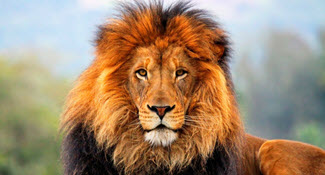

In [5]:
display(Image(filename='images/lion.jpg', embed=True))

While the image of the lion appears to be 'solid and continuous,' it actually consists of a series of small dots  arranged in a grid of rows and columns. The grid is more easily seen by zooming in on a small segment of the image. This is done in Figure 2 which provides a magnified view of the lion's right eye. Looking at this figure, you'll notice that the dots are individual squares, each with a single color.

<a class="anchor" id="Fig_2"></a>
<h5>Figure 2. Zoomed image of the Lion's Eye</em></h5>
<a href='#toc'>Return to TOC</a>

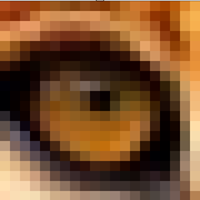

In [6]:
display(Image(filename='images/lions_eye.png', embed=True))

The dots making up the image are called <i>pixels</i>. Technically speaking, a pixel (or picture element) is the smallest addressable element in a <i>raster image</i>. In computing, raster images are <i>bitmaps</i>. A bitmap image is a rectangular grid of square-shaped pixels. Each pixel has an addressable position within the image and a particular 'color' specified by a number of bits. In our case, the way in which the pixel position is specified depends on the particular Python libraries being used to do the processing and the way in which the color is displayed and interpreted depends on the particular color model being used.

<a class="anchor" id="Coordinate"></a>
<h2>2. Coordinate Systems</h2>
<a href='#toc'>Return to TOC</a>

In geometry, a coordinate system uses one or more numbers, or coordinates, to uniquely determine the position of the points in a defined space. Generally, the position is specified by a pair of ordered numbers of letters, e.g. (2, 3) or (x,y) where "x" and "y" stand for numbers.

<a class="anchor" id="Cartesian"></a>
<h3>2.1 Cartesian Coordinates</h3>
<a href='#toc'>Return to TOC</a>

The prototypical coordinate system is the <i>Cartesian</i>. In this sort of system, "each point is uniquely specified by a pair of numerical coordinates, which are the signed distances to the point from two fixed perpendicular oriented lines, measured in the same unit of length." An example of such a system is shown in Figure 3. In this figure there are two perpendicular axes "x" and "y." The origin of this system is denoted (0,0). Distances from the origin to the right and up are positive and those to the left or down are negative. In this system, points can be denoted by a tuple (x,y) where x stands for the distance of the point from 0 on the horizontal or "x" axis and y stands for the distance of the point from 0 on the vertical or "y" axis. So, for instance, in Figure 3 the point designated (2,3) is a positive distance of 2 from the origin on the x-axis and 3 is a positive distance of 3 from the origin on the y-axis. Similarly, the point (-3,1) is a negative distance of -3 from the origin on the x-axis and a positive distance of 1 from the origin on the y-axis.

<a class="anchor" id="Fig_3"></a>
<h5>Figure 3. Cartesian Coordinates (source: Wikipedia)</em></h5>
<a href='#toc'>Return to TOC</a>

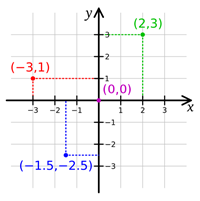

In [7]:
display(Image(filename='images/cartesian_coords_small.png', embed=True))

<a class="anchor" id="PythonCoord"></a>
<h3>2.2 Python Image Coordinate Systems</h3>
<a href='#toc'>Return to TOC</a>

As noted, an image in Python (and many other programming languages) is simply a grid of pixels. The position of each pixel in the grid is denoted by a tuple (r, c) where 'r' and 'c' are the row and column locations of the pixel, respectively. The numbering of the rows and columns is 'zero-based', meaning that it starts with '0'. Assuming that there are 'n' rows and 'm' columns, the last row of the grid would be 'n-1, while the last column would be 'm-1'. Given these factors, the pixels in the corners of the grid/image would designated as:

<ul>
    <li>top-left - (0,0)</li>
    <li>top-right - (0,m-1)</li>
    <li>bottom-left - (n-1,0)</li>
    <li>bottom-right - (n-1, m-1)</li>
</ul>

These notations, as well as the layout and direction of the axes, are illustrated in Figure 4.

<a class="anchor" id="Fig_4"></a>
<h5>Figure 4. Python Image Coordinates</em></h5>
<a href='#toc'>Return to TOC</a>

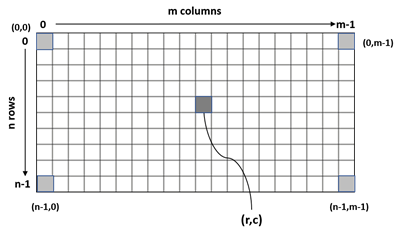

In [8]:
display(Image(filename='images/skimg_coord_sys_small.png', embed=True))

When comparing Figure 4 with Figure 3, it's important to remember some key differences:

<ol>
    <li>The Python language is zero indexed.</li>
    <li>The origin starts in the top-left corner of the image and increases as we move to the right and down.</li>
    <li>Finally, specifying the location of each pixel as (r,c) reverses the traditional roles of the x and y axes. In the Cartesian system, points are usually specified as (x,y) where x-axis is horizontal and the y-axis vertical. However, in a Python image typically the rows represent the vertical or y-axis and the columns represent the horizontal or x-axis. So, strictly speaking each tuple in an image is designated as (y,x).</li>
</ol>

<a class="anchor" id="Libraries"></a>
<h3>2.3 Exploring the Coordinate System with Python Image Processing Libraries</h3>
<a href='#toc'>Return to TOC</a>

To see how this coordinate system works in practice, let's considered how it is manifested in three of the more frequently used Python image processing libraries -- sckit-image, OpenCV, and PIL. In a nutshell:

<ul>
    <li><b>sckit-image</b> -- (aka skimage) is an open-source image processing library that includes algorithms for segmentation, geometric transformations, color space manipulation, analysis, filtering, morphology, feature detection, and more. It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.</li><br\>
    <li><b>OpenCV</b> -- is an open-source library that was developed by Intel in the year 2000. It is mostly used in computer vision tasks such as object detection, face detection, face recognition, image segmentation, etc. There are all areas where machine learning (ML) can be applied.</li><br\>
    <li><b>PIL and <a href="https://python-pillow.org/">pillow</a></b> -- PIL stands for 'Python Image Library'. Like the others, it is an open-source library supporting opening, manipulating and saving images of various formats. Technically, development of PIL stopped in 2009. Since that time the focus has been on pillow, a 'friendly' fork of PIL. Interestingly, to access the processing capabilities of 'pillow', you still declare pillow using 'import PIL' or 'from PIL import sub_lib' where 'sub_lib' of the designate library. In the case of PIL/pillow, 'Image' is the a key sublibrary in PIL image processing.
</ul>

The discussion that follows illustrates how to use these libraries to: (1) read and display an image; (2) access the underlying structure and coordinates of the image; (3) understand and manipulate the images color models; and (4)save any modified or new images created during image processing.

<a class="anchor" id="Coordinates_sk"></a>
<h4>2.3.1 skimage Coordinate System</h4>
<a href='#toc'>Return to TOC</a>

As it's name implies, the skimage 'io' module provides utilities for reading, writing and saving images in various formats. The first step in most analysis is reading an external file with a particular format (e.g. '.png' or '.jpg'). When this is done, it's a good idea to first check the type of data, the structure, and the values of a few pixels.  We'll see, by default the different formats vary with respect to these factors. These differences have important impacts of subsequent processing.

<a class="anchor" id="Fig_5"></a>
<h5>Figure 5. Reading the lion.jpg file using skio.imread</em></h5>
<a href='#toc'>Return to TOC</a>

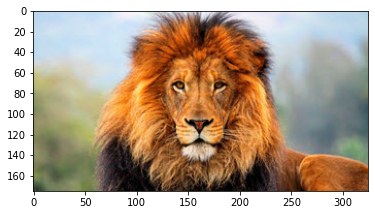

In [9]:
img_sk = skio.imread(imgFile)
img_show(img_sk)

In [10]:
# some of the key elements of the image coordinate system
# employed by the skimage library

img_sk_height = img_sk.shape[0] # number of rows
img_sk_width = img_sk.shape[1] # number of cols
img_sk_channels = img_sk.shape[2] # number of channels
tot_sk_pixels = img_sk_height * img_sk_width

print("data type: {}".format(type(img_sk)))
print("Shape of img_sk {}".format(img_sk.shape))
print("Height of img_sk: {} pixels".format(img_sk_height))
print("Width of img_sk: {} pixels".format(img_sk_width))
print("Channels of img_sk: {}".format(img_sk_channels))
print("Total Pixels in img_sk: {}".format(tot_sk_pixels))
print("Value of img_sk[0,0]: {}".format(img_sk[0,0]))

data type: <class 'numpy.ndarray'>
Shape of img_sk (175, 325, 3)
Height of img_sk: 175 pixels
Width of img_sk: 325 pixels
Channels of img_sk: 3
Total Pixels in img_sk: 56875
Value of img_sk[0,0]: [189 216 237]


<a class="anchor" id="Coordinates_cv2"></a>
<h4>2.3.2 cv2 Coordinate System</h4>
<a href='#toc'>Return to TOC</a>

Unlike skimage, cv2 has no separate module for io functions. Instead, it relies on individual methods for these purposes. cv2.imread() is the method that loads an image from the specified file. There are 3 variations of this method. 'imread_COLOR' (ignores transparency), 'imread_GRAYSCALE' and imread_UNCHANGED (reads transparency if present).

<a class="anchor" id="Fig_6"></a>
<h5>Figure 6. Reading the lion.jpg file using cv2.imread</em></h5>
<a href='#toc'>Return to TOC</a>

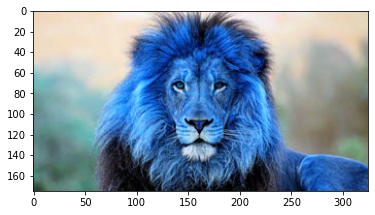

In [11]:
img_cv2 = cv2.imread(imgFile)
img_show(img_cv2)

Oops!!! We've ended up with a blue lion. What's happened?

If you look closely at the shapes and values for the three libraries(shown below), you'll see that cv2 image has the same shape as the skimage image (175,325,3), but within this shape the pixels at the same locations have different values. So, in the upper-right corner the value for img_sk is the tuple \[237 216 189\], but for img_cv2 it's the tuple \[189 216 237\]. The first and last numbers are reversed. In a moment we'll discuss what these numbers represent. In the mean time, let's just reverse these numbers. When that's done and the resulting cv2 image (Figure 7) is shown, we'll have our 'orang-ish/red-ish/yellow-ish' lion back.  

In [12]:
# the same code used to display key elements of the image produced by skimage
# can be used with cv2, but the results are slightly different

print('Characteristics of CV2 Image after reversing Blue and Red Channels')

print("data type: {} ".format(type(img_cv2)))
img_cv2_height = img_cv2.shape[0] # number of rows
img_cv2_width = img_cv2.shape[1] # number of cols
img_cv2_channels = img_cv2.shape[2] # number of channels
tot_cv2_pixels = img_cv2_height * img_cv2_width

print("Shape of img_cv2 {}".format(img_cv2.shape))
print("Height of img_cv2: {} pixels".format(img_cv2_height))
print("Width of img_cv2: {} pixels".format(img_cv2_width))
print("Channels of img_cv2: {}".format(img_cv2_channels))
print("Total Pixels in img_cv2: {}".format(tot_cv2_pixels))
print("Value of img_cv2[0,0]: {}".format(img_cv2[0,0]))

Characteristics of CV2 Image after reversing Blue and Red Channels
data type: <class 'numpy.ndarray'> 
Shape of img_cv2 (175, 325, 3)
Height of img_cv2: 175 pixels
Width of img_cv2: 325 pixels
Channels of img_cv2: 3
Total Pixels in img_cv2: 56875
Value of img_cv2[0,0]: [237 216 189]


<a class="anchor" id="Fig_7"></a>
<h5>Figure 7. Converting blue-ish lion image by reversing blue and red channels</em></h5>
<a href='#toc'>Return to TOC</a>

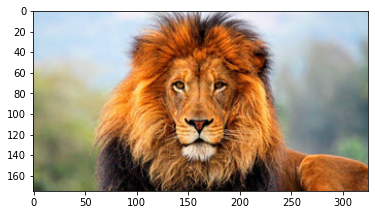

In [13]:
img_cv2_reversed = img_cv2[:, :, ::-1]
img_show(img_cv2_reversed)

<a class="anchor" id="Coordinates_PIL"></a>
<h4>2.3.3 PIL Coordinate System</h4>
<a href='#toc'>Return to TOC</a>

The PIL/pillow module 'Image' creates "a class with the same name which is used to represent a PIL image. The module also provides a number of factory functions, including functions to load images from files, and to create new images." Unlike the other two libraries, PIL uses the more traditional term of 'open.' The resulting default object differs from those produced by skimage and cv2.

<a class="anchor" id="Fig_8"></a>
<h5>Figure 8. Opening/reading the lion.jpg file using PIL Image.open</em></h5>
<a href='#toc'>Return to TOC</a>

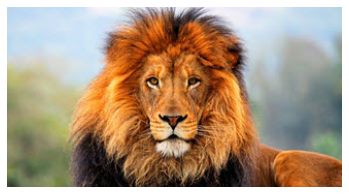

In [14]:
#read image with PIL image open
img_PIL = PIL.Image.open(imgFile)
img_show(img_PIL, show_axes = 'no')

In [15]:
# some of the key elements of the image coordinate system
# employed by PIL

print('Characteristics of PIL Lion JPG Image')
print("Data type {}".format(type(img_PIL)))
print("Image Format", img_PIL.format)
print("Size: {}".format(img_PIL.size))
print("Height: {}".format(img_PIL.height))
print("Width: {}".format(img_PIL.width))

Characteristics of PIL Lion JPG Image
Data type <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image Format JPEG
Size: (325, 175)
Height: 175
Width: 325


As the above output illustrates, there are few things that are important to observe about PIL images. First, unlike the images in the other two libraries, PIL images are not numpy arrays. Second, the images/arrays in the other two libraries were both 175x325, while the PIL image is 325x175. More generally, the other two were in an 'y,x' or 'row,col' order, while PIL is in an 'x,y' or 'col,row' order.

Besides being somewhat confusing and 'non-standard', the PIL array format makes it more difficult to manipulate and analyze.
One way to remedy these differences is to convert img_PIL into a numpy array. This is done in the following cell. As one can see, by converting transforming this array to a numpy array, the structure and values of the pixels are now the same.

In [16]:
# Convert from default PIL image file to numpy array
img_Arr_PIL = np.asarray(img_PIL)

img_Arr_PIL_height = img_Arr_PIL.shape[0] # number of rows
img_Arr_PIL_width = img_Arr_PIL.shape[1] # number of cols
img_Arr_PIL_channels = img_Arr_PIL.shape[2] # number of channels
tot_Arr_PIL_pixels = img_Arr_PIL_height * img_Arr_PIL_width

print("Data type of {}".format(type(img_Arr_PIL)))
print("Shape of img_Arr_PIL: {}".format(img_Arr_PIL.shape))
print("Height of img_Arr_PIL: {} pixels".format(img_Arr_PIL_height))
print("Width of img_Arr_PIL: {} pixels".format(img_Arr_PIL_width))
print("Channels of img_Arr_PIL: {}".format(img_Arr_PIL_channels))
print("Total Pixels in img_Arr_PIL: {}".format(tot_Arr_PIL_pixels))
print("Value of img_Arr_PIL[0,0]: {}".format(img_Arr_PIL[0,0]))

Data type of <class 'numpy.ndarray'>
Shape of img_Arr_PIL: (175, 325, 3)
Height of img_Arr_PIL: 175 pixels
Width of img_Arr_PIL: 325 pixels
Channels of img_Arr_PIL: 3
Total Pixels in img_Arr_PIL: 56875
Value of img_Arr_PIL[0,0]: [189 216 237]


<a class="anchor" id="Color"></a>
<h2>3. Color Models and Spaces</h2>
<a href='#toc'>Return to TOC</a>

Thus far, we've only considered the structure and coordinates of the images generated by three three Python image libraries. Based on this review, we know for example that the pixel in upper-left corner of an image is found at the location row '0' and column '0', or that the location of the pixel in the lower-right corner is at 'number of rows-1' (e.g. 175-1) and 'number of columns-1' (e.g. 325-1). We've also shown (without comment) for this particular image that the value of the pixel in the upper-left corner is a tuple oc three numbers (e.g. \[189 216 237\]). What we haven't discussed is what the value of the pixels at these locations mean. More specifically, the value is usually a tuple with 3 (or sometimes 4) numbers. What do these individual numbers represent and how are they used?

In answering these interrelated questions, we're going to focus on the numpy representation of the lion.jpg image we've been examining. This representation can easily be generated and handled by all three of the image libraries we've discussed. To simplify and genericize the discussion, we'll start by copying the img_sk image into a new numpy array called img_rgb. The reason for adding the 'rgb' abbreviation to the name will become apparent in a moment.

In [17]:
# all of these arrays img_sk, img_cv2_rgb and img_arr_PIL
# have the same 'shape' (175,375,3) and content.
# any of them can be used to create the generic array img_rgb

img_rgb = img_sk.copy()

num_rows = img_rgb.shape[0] # number of rows or height of image
num_cols = img_rgb.shape[1] # number of cols or width of image

cent_row = int(round(num_rows/2)) # center coordinates
cent_col = int(round(num_cols/2))

print("Value in upper-left corner (0,0): {}".format(img_rgb[0,0]))
print("Value in upper-right corner (0,{}): {}".format(num_cols-1, img_rgb[0,num_cols-1]))
print("Value in lower-right corner ({},{}): {}".format(num_rows-1,num_cols-1,img_rgb[num_rows-1,num_cols-1]))
print("Value in lower-left corner ({},0): {}:".format(num_rows-1,img_rgb[num_rows-1,0]))
print("Value in the center ({},{}): {}:".format(cent_row,cent_col,img_rgb[cent_row,cent_col]))

Value in upper-left corner (0,0): [189 216 237]
Value in upper-right corner (0,324): [178 210 225]
Value in lower-right corner (174,324): [120  73  31]
Value in lower-left corner (174,0): [69 73 58]:
Value in the center (88,162): [232 162  93]:


Reiterating what was discussed earlier, the image array img_rgb has 175 X 325 = 56875 pixels. The value of each pixel is a tuple with 3 numbers. Each of these numbers is an 8-bit or one byte integer (denoted uint8). What we can't see is that the range of the numbers is 0-255. Also, we can't immediately discern what each of the integers represent. The answer to these and other questions revolves around the notion of a 'color model.' 

A <i>color model</i> is "an abstract mathematical model that describes how colors can be represented as a set of numbers. When the model is associated with a precise description of how the components are to be interpreted (viewing conditions, etc.), the resulting set of colors is called a "color space" (Wikipedia). "In reality, color is a continuous phenomenon, meaning that there are an infinite number of colors. Color spaces, however, represent color through discrete structures (a fixed number of whole number integer values), which is acceptable since the human eye and perception are also limited. Color spaces are fully able to represent all the colors we are able to distinguish between."

<a class="anchor" id="RGB_Color_Model"></a>
<h3>3.1 RGB Color Model</h3>
<a href='#toc'>Return to TOC</a>


In the case of 'skimage' and 'PIL' libraries, the default color model is <i>RGB</i>. This stands for the three primary colors on which the model is built - red, green and blue. The intensities of these three primary colors are combined additively to create a range of ~16.8 million (=256x256x256) possible colors from completely black (0, 0, 0) to completely white (255, 255, 255). Thus, the color of any pixel is a combination of the red, green and blue numbers in that order. For instance, red is (255, 0, 0) while orange is (255, 127, 0). 

Geometrically, Figure 9 provides a cubic 3D representation of the RGB color space. In this (coordinate) space there are three axes or 'channels' labeled Red, Green and Blue. Each axes is made up of 256 unique values ranging from 0 to 255 (which means there is no number like '0.5' on the axes). The axes are all perpendicular to one another.  Although it's hard to imagine, this cube contains 256 x 256 x 256 individual points (as noted ~16.8 million). The location of each of these points within the confines of this cube is at the intersection of the r, g, b numbers.

<a class="anchor" id="Fig_9"></a>
<h5>Figure 9. RGB Color Model and Space</h5>
<a href='#toc'>Return to TOC</a>

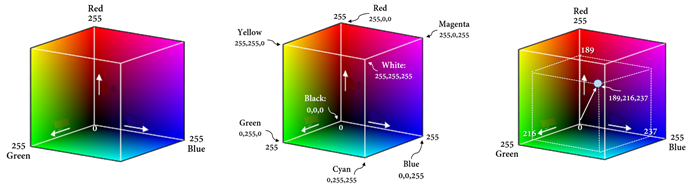

In [18]:
display(Image(filename='images/rgb_color_model_small.png', embed=True))

Since the model is a cube, it has eight corners (each corner is a single pixel). The three primary colors are found at the max value of their associated axes. Red is at (255,0,0), Green is at (0, 255, 0) and Blue is at (0, 0, 255). The other corners of the cube are occupied by the 'secondary' colors -- yellow, cyan and magenta. Each of these secondary colors consists of a combination of the strongest intensities of two of the primary colors, while the third color is at minimum intensity. Thus, yellow is at (255, 255, 0) which is a combination of red and green at their max, cyan is (0, 255, 255) which is green and blue at their max, and magenta is at (255, 0, 255) which is red and blue at their max. Finally, the remaining corners are occupied by black (0, 0, 0) which is the absence of color and white (255, 255, 255) which is a combination of all three primaries at their max intensities.

To determine the color for a specific pixel in an image of interest (like the lion image), you take the specified pixel value and locate its position in the RGB cube. Basically, you're plotting a vector in 3D space. For instance, as we have noted, the pixel value of the upper-left corner (0,0) of the lion image is '189,216,237'. As shown in Figure 9, this is a vector whose endpoint is found at the intersection of red=189, green=216, and blue=237. On the surface, we can note a few of things about this vector. First, each of the individual color channels is fairly close to its max value of 255. Second, because of the combined values, the endpoint of the vector is also fairly close to the endpoint of '255,255,255'. This means that it's tending towards white. Third, among the three color channels, blue has the strongest intensity (237 > 216 > 189). So, a good guess about the combined color is 'light blue' or 'white-ish cyan'. As you can see from the point at the end this vector (which has been greatly magnified), the color is a light blue. In fact, if you were to modify the red channel, holding the green and blue channels at 216 and 237, the result would we still be a 'blue-ish' color until the red channel was as strong at the green channel. At that point, the resulting color would start tending towards light purple or light magenta.       

<a class="anchor" id="RGB_Color_Channels"></a>
<h4>3.1.1 RGB Color Channels</h4>
<a href='#toc'>Return to TOC</a>

In practice we don't use a geometric representation to determine the specific color associated with a specific combination of red, green and blue. This representation is used primarily for conceptual purposes not practical purposes. Instead, there are various formulas that are used to calculate a single binary number based on an additive combination of the three channels. It's this binary value that eventually is used to physically produce the color that appears on the display. For example, many computer and TV screens consist of a collection of rectangular or circular pixels. You can actually see these pixels even with a weak magnifying glass. Each of the pixels contains three lights - red, green and blue. The binary value created by the formula is converted into electric signals that determine the intensity of each of the individual lights. It's the combination of the intensities of the lights that fools our eyes (and brain) into thinking we're looking at a single color. Figures 10 and 11 illustrate how this works.

In [19]:
# img_rgb.shape is (175,375,3) to create an image devoted to one channel
# we simply set the other channel numbers to 0 for every pixel.
# Among the three channels red is the 0 position, green the 1 position
# and blue is '2' position

red_image = img_rgb.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

green_image = img_rgb.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

blue_image = img_rgb.copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

print("Sample values for Red, Green and Blue Channels")
print('Value of upper-left corner of original img_rgb: {}'.format(img_rgb[0,0]))
print('Value of upper-left corner red channel: {}'.format(red_image[0,0]))
print('Value of upper-left corner green channel: {}'.format(green_image[0,0]))
print('Value of upper-left corner blue channel: {} \n'.format(blue_image[0,0]))

print('Value of lower-right corner of original img_rgb: {}'.format(img_rgb[174,324]))
print('Value of lower-right corner red channel: {}'.format(red_image[174,324]))
print('Value of lower-right corner green channel: {}'.format(green_image[174,324]))
print('Value of lower-right corner blue channel: {}\n'.format(blue_image[174,324]))

Sample values for Red, Green and Blue Channels
Value of upper-left corner of original img_rgb: [189 216 237]
Value of upper-left corner red channel: [189   0   0]
Value of upper-left corner green channel: [  0 216   0]
Value of upper-left corner blue channel: [  0   0 237] 

Value of lower-right corner of original img_rgb: [120  73  31]
Value of lower-right corner red channel: [120   0   0]
Value of lower-right corner green channel: [ 0 73  0]
Value of lower-right corner blue channel: [ 0  0 31]



<a class="anchor" id="Fig_10"></a>
<h5>Figure 10. Display of separate RGB color channels</h5>
<a href='#toc'>Return to TOC</a>

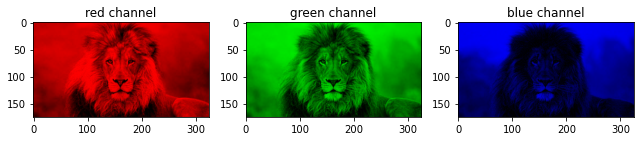

In [20]:
# Display each of the channel images with matplotlib
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 3))
ax0.imshow(red_image)
ax0.set_title("red channel")
ax1.imshow(green_image)
ax1.set_title("green channel")
ax2.imshow(blue_image)
ax2.set_title("blue channel")
fig.tight_layout();

In interpreting the three images for the separate channels, we need to remember that for each of the channels the lighter colored pixels are high intensity (moving toward a numeric value of 255), while the darker colored pixels are low intensity (moving toward 0). So, in the image of the lion, it's clear that red and green channels are high intensity channels, while the blue channel is low intensity. This is evidenced by the fact that you can tell that there is a lion in the red and green images, but it's hard to discern the contents of the blue image outise of the sky.

<a class="anchor" id="Combine_RBG_Channels"></a>
<h4>3.1.2 Combining RGB Color Channels</h4>
<a href='#toc'>Return to TOC</a>

Figure 11 details how these channels are mathematically combined to produce the colors in the actual image. On the surface, each pixel value is displayed as three integers (like (189, 217, 237)). Behind the scenes, however, these are 8 bit integers (uint8) ranging from '00000000' to '11111111' which translate into 0 and 256. When they suggest that RGB is additive, it doesn't mean that you add 189+217+237. Instead, it's bit more complicated. We actually combine the three 8 bit binaries into a single 24 bit binary. This is done by putting the red binary bits into the top 8-bits of the number, followed by the green binary bits in the next 8 bits, then followed by the blue binary in the lowest 8 bits. Mathematically, this is the same as:

    pixel_24_bits = R*256*256 + G*256 + B
   
For example, in the case of the upper-left corner of RGB lion image, the 24-bit result would be:

    Channel                        Integer    Hex               Binary
    red_channel   = 189*256*256  = 12386304 = #BD 00 00 (hex) = 0b101111010000000000000000
    green_channel =     217*256  =    55552 = #00 D9 00 (hex) = 0b000000001101100100000000
    blue_channel  =         237  =      237 = #00 00 ED (hex) = 0b000000000000000011101101
    RGB =         = rc + gc + bc = 12442093 = #BD D9 ED (hex) = 0b101111011101100111101101


While the RGB tuple or the Hex representations are often used in programming or in looking up the color in a 'RGB color picker', it's the binary representation that is used to actually drive the color on a screen.

<a class="anchor" id="Fig_11"></a>
<h5>Figure 11. RGB mathematically model'</h5>
<a href='#toc'>Return to TOC</a>

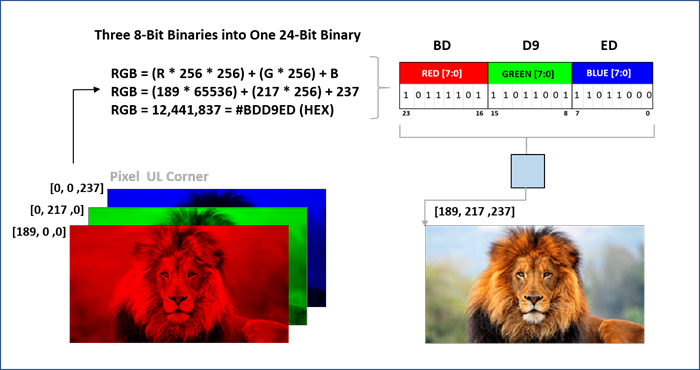

In [21]:
display(Image(filename='images/RGB_24_Bits_small.png', embed=True))

If you want to see what any particular color looks like, there are any number of RGB color pickers that will do the job. All you need is either the RGB tuple or the associated HEX value. Barring this, you can accomplish the task with a few lines of code.

<a class="anchor" id="Fig_12"></a>
<h5>Figure 12. Displaying a Single RGB Color given the Associated Tuple</h5>
<a href='#toc'>Return to TOC</a>

RGB Color of Pixel: (255, 255, 0)


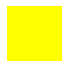

In [22]:
# create img (i.e. numpy array labeled 'canvas')
# fill image with single rgb color denoted by tuple
h = 5
w = 5
#colr = (189,217,237)
colr = (255,255, 0)
canvas = np.full((h, w, 3), colr, dtype=np.uint8)

# display canvas
rect_sz = 1.0 # in inches -- size can be altered by adjust
print("RGB Color of Pixel: {}".format(colr))
plt.figure(figsize=(rect_sz,rect_sz))
plt.axis('off')
plt.imshow(canvas);

In [23]:
# Note: Often RGB colors are specified in hexadecimal format (e.g red is #FF0000)
hx = "#BDD9ED"
arr = hex2rgb(hx)
print("from hex {} to array {}".format(hx,arr))

# reverse rgb to hex
colr = (189,217,237)
hx = rgb2hex(colr[0],colr[1],colr[2])
print("from array {} to hex {}".format(arr,hx))

from hex #BDD9ED to array (189, 217, 237)
from array (189, 217, 237) to hex #BDD9ED


<a class="anchor" id="Color_Other"></a>
<h3>3.2 Other Color Models and Spaces</h3>
<a href='#toc'>Return to TOC</a>

Although the 24-bit RGB color model is used extensively, it's only one of handful of major color space models each of which has its own variants. The number and variety of the models arise because different models serve different purposes. A few of the key models are discussed and illustrated below.

<a class="anchor" id="RGB_Variants"></a>
<h4>3.2.1 RGB Variants - BRG and RGBA</h4>
<a href='#toc'>Return to TOC</a>

Like other models, RGB has it's variants and extensions. Among the ones that are frequently encountered are:

<ul>
    <li><b>BRG</b> -- One of the key variants is BGR. In this model, the positions of red and blue are reversed. Basically, everything else stays the same. We've already encountered this model because it's is the default for the cv2 library. In this model the red and blue channels are reversed, i.e. red (255,0,0) becomes (0,0,255), blue (0,0,255) becomes (255,0,0), and green states the same (0,255,0). cv2 has a method 'cv2.cvtColor(image_array, conversion_flag)' that converts an image in array form from one color model to another color model with the pair denoted by the 'conversion_flag'. The specific pairs of conversions that are supported by the method is a long list (for the list see <a href = " https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html">cv2 conversion flags</a>). In this case the flag for converting from BRG to RGB is 'COLOR_BRG2RGB' (and vice-versa). Here, the method call would be 'cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)'. As shown earlier, a simple alternative to using this conversion method is to swap the red and blue colors with an array manipulation (i.e. image_array[:, :, ::-1]).
    </li><br\>
    <li><b>RGBA</b> -- RGBA extends the RGB model by adding fourth channel called 'alpha'. The fourth channel is an alpha channel which ranges from 0 to 255. "An alpha value of 0 will make the pixel fully transparent, a value 255 will make it fully opaque, values in between will make the pixel partly transparent."

In the code segment below, we create an RGBA image by first establishing a 'zero' numpy array with 4 channels (not 3). We then set the pixels on the left side of the array to orange and those on the right side to blue. In each case, the alpha value is set to 255. This means that each pixel in this array will be opaque (aka non-transparent). When the array is show in this state, it's as if the colors of the pixels were untouched. Next, for comparison we change the alpha value for successive columns of pixels from 0 to 200. This means that the pixels on the left side of the image will be transparent, and the pixels at the right will be almost fully opaque. The transparency varies smoothly from left to right. </li>
</ul>

<a class="anchor" id="Fig_13"></a>
<h5>Figure 13. Comparing RGB image with transparent RGBA image</h5>
<a href='#toc'>Return to TOC</a>

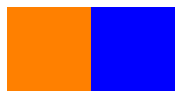

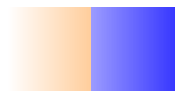

In [24]:
# the basic idea for this code came from
# https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/

arr = np.zeros([100, 200, 4], dtype=np.uint8)
arr[:,:100] = [255, 128, 0, 255] #Orange left side
arr[:,100:] = [0, 0, 255, 255]   #Blue right side
plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(arr);

# Set transparency depending on x position
for x in range(200):
    for y in range(100):
        # for each column denoted by x
        # set the color values of all the y pixels in that column
        # to the same alpha value starting at 0 (transparent) and 
        # going to 200 (almost completely opaque)
        arr[y, x, 3] = x

plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(arr);

RGBA is particularly important because images that are stored as '.png' files support transparency. When these files are read by methods from the skimage or PIL libraries, the default color model is RGBA. cv2 can also read '.png' image files but it requires the addition of special flag 'cv2.IMREAD_UNCHANGED' to identify the model. The resulting array has 4 channels with alpha being the first one. Of course, you shouldn't be surprised by the results because the default model for cv2 is BGR, so in this instance it's actually BGRA instead of RGBA.

<a class="anchor" id="Fig_14"></a>
<h5>Figure 14. Reading a PNG image file and displaying the RGBA contents</h5>
<a href='#toc'>Return to TOC</a>

Shape of RGBA Image read by skimage io : (175, 325, 4)

Value of img_png[0:2,0:2]:
 [[[188 214 237 255]
  [186 214 238 255]]

 [[189 215 238 255]
  [186 214 238 255]]] 

Display of RGBA 4 Channel Image


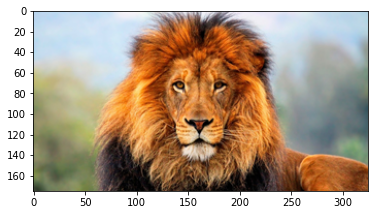

In [25]:
img_file_png =os.getcwd() + '\images\lion.png'

img_png = skio.imread(img_file_png)
print("Shape of RGBA Image read by skimage io : {}\n".format(img_png.shape))
print("Value of img_png[0:2,0:2]:\n {} \n".format(img_png[0:2,0:2]))
print("Display of RGBA 4 Channel Image")
plt.imshow(img_png);

<a class="anchor" id="Fig_15"></a>
<h5>Figure 15. Transforming a RGBA (PNG) image file into a cv2 BGRA image</h5>
<a href='#toc'>Return to TOC</a>

Shape of RGBA Image read by cv2 with cv2.IMREAD_UNCHANGED: (175, 325, 4)

Value of img_png[0:2,0:2]:
 [[[237 214 188 255]
  [238 214 186 255]]

 [[238 215 189 255]
  [238 214 186 255]]] 

Display of BRGA 4 Channel cv2 Image


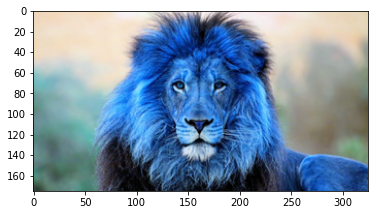

In [26]:
img_cv2_png = cv2.imread(img_file_png, cv2.IMREAD_UNCHANGED)
print("Shape of RGBA Image read by cv2 with cv2.IMREAD_UNCHANGED: {}\n".format(img_cv2_png.shape))
print("Value of img_png[0:2,0:2]:\n {} \n".format(img_cv2_png[0:2,0:2]))
print("Display of BRGA 4 Channel cv2 Image")
plt.imshow(img_cv2_png);

<a class="anchor" id="Color_CMYK"></a>
<h4>3.2.2 CMYK Color Model and Space</h4>
<a href='#toc'>Return to TOC</a>
    
In the world of printing and painting, the major color model is CMYK, an abbreviation standing for the RBG secondary colors of Cyan, Magenta, Yellow and Key (which is black). These, for example, are the colors of the inks used by most computer printers.
CMYK is a substractive model meaning that colors are created through subtracting wavelengths of visible light. "The wavelengths of light that don’t get absorbed are reflected. That reflected light ends up being the color we see." 

Unlike 8-bit RGB where the range of any color is (0,255), in CMYK the range is usually either (0,1) or (0%,100%) for all 4 channels. In this model, the roles of white and black are reversed. With this reversal, white is the absence of all color, while black is a combination of cyan, magenta and yellow. Since RGB and CMYK spaces are both device-dependent spaces, there is no simple or general conversion formula that converts between them. However, the code below exemplifies one alternative for converting pixels from the RGB model to the CYMK model. As this example shows, the secondary colors become primary, while the primary colors become secondary. The means, for instance, that red goes from (255,0,0) to (0.0, 100.0, 100.0, 0.0) and yellow goes from (255,255,0) to (0.0, 0.0, 100.0, 0.0).

In [27]:
# source: derived from 
RGB_SCALE = 255
CMYK_SCALE = 100

def rgb_to_cmyk(r, g, b):
    if (r, g, b) == (0, 0, 0): # black
        return 0, 0, 0, CMYK_SCALE

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE

    # extract out k [0, 1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy

    # rescale to the range [0,CMYK_SCALE]
    return c * CMYK_SCALE, m * CMYK_SCALE, y * CMYK_SCALE, k * CMYK_SCALE

In [28]:
colr_list = ['white','red','green','blue','cyan','magenta','yellow','black']

rgb_white = (255,255,255)
rgb_red = (255,0,0)
rgb_green = (0,255,0)
rgb_blue = (0,0,255)
rgb_cyan = (0,255,255)
rgb_magenta = (255,0,255)
rgb_yellow = (255,255,0)            
rgb_black = (0,0,0)             

colrs = [rgb_white,rgb_red,rgb_green,rgb_blue,rgb_cyan,rgb_magenta,rgb_yellow,rgb_black]

for i in range (len(colrs)):
    colr = colrs[i]
    print("{} -- RGB color {} to CMYK color {}".format(colr_list[i],colrs[i],rgb_to_cmyk(colr[0],colr[1],colr[2])))

white -- RGB color (255, 255, 255) to CMYK color (0.0, 0.0, 0.0, 0.0)
red -- RGB color (255, 0, 0) to CMYK color (0.0, 100.0, 100.0, 0.0)
green -- RGB color (0, 255, 0) to CMYK color (100.0, 0.0, 100.0, 0.0)
blue -- RGB color (0, 0, 255) to CMYK color (100.0, 100.0, 0.0, 0.0)
cyan -- RGB color (0, 255, 255) to CMYK color (100.0, 0.0, 0.0, 0.0)
magenta -- RGB color (255, 0, 255) to CMYK color (0.0, 100.0, 0.0, 0.0)
yellow -- RGB color (255, 255, 0) to CMYK color (0.0, 0.0, 100.0, 0.0)
black -- RGB color (0, 0, 0) to CMYK color (0, 0, 0, 100)


<a class="anchor" id="Color_HSV"></a>
<h4>3.2.3 HSV Color Model and Space</h4>
<a href='#toc'>Return to TOC</a>

HSV (also known as HSB) is an alternative color model to RGB. In this model, colors are described by their hue (H), saturation (S), and value (V) or brightness (B). This representation models how colors appear when a light is shined on a colored object. For example, if a very bright light is shined on a blue object, it will appear blue although brighter and more intense. When a dim light is shined on the same object, it will appear darker and less bright but still blue-ish, although at some point it will begin to appear black-ish.

RGB is "notoriously difficult to get a good intuitive feeling for how to find particular colors." If, you want to create a dark brown or even a light green, it's not an easy task to determine the linear combination of red, green and blue that will produce the desired result. HSV was designed to approximate the way humans perceive and interpret colors, providing a more intuitive way to manipulate colors. This is one of the reasons it's frequently used in color pickers.

There are a variety of ways to depict the HSV model. One of these is with a cylinder (see Figure XX). In a cylindrical representation there are 3 dimensions: The angle is the Hue, the radius is the Saturation, the vertical axis is the Value or Brightness. and the angle represent the Hue. 

<ol>
    <li><em>Hue</em> -- a single number representing the tint or shade of the color. Hue is measured by the angle of the cylinder. Typically, the angle ranges from 0 degrees to 360 degrees where 0 is red, 120 green, 240 blue, back to red again at 360. In between are the rest of the colors, e.g. yellow at 60, cyan at 180, and magenta at 300. Hue is often displayed as a color wheel.</li><br\>
    <li><em>Saturation</em> -- reflects the intensity or vividness of a color, determined by the amount of white light mixed with a hue. Saturation is measured as a percentage of the horizontal distance along the radius of the cylinder. At the center where the color is basically white, it is 0%. At the edge, where the color is most vivid, it is 100%. </li><br\>
    <li><em>Value or Brightness</em> -- Value or Brightness is the 'chromic' notion of intensity. Like Saturation, Value is mesured as a percentage of the vertical axis starting at the bottom (0%) and running to the top (100%). The lower the value, the blacker the color becomes. The higher the value, the closer the color gets to its pure state.</li><br\> 
</ol>   

<a class="anchor" id="Fig_16"></a>
<h5>Figure 16. HSV model and space</h5>
(Source: https://http://newmediaabington.pbworks.com/w/page/66977432/Color)<br>
<a href='#toc'>Return to TOC</a>

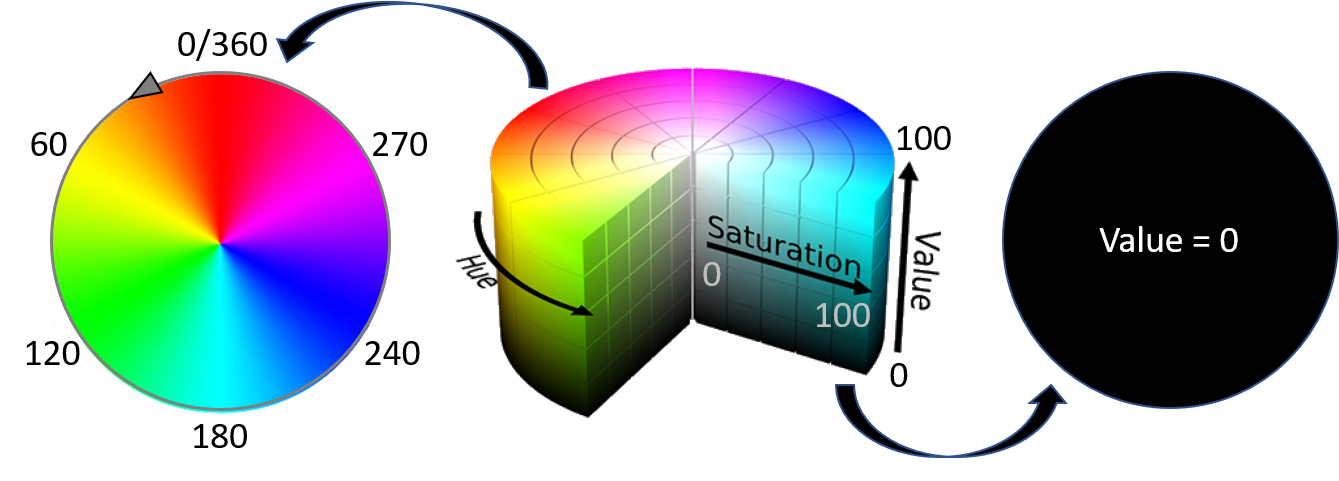

In [29]:
display(Image(filename='images/HSV_Color_Model.png', width = 670, height = 240, embed=True))

<h5>Alternative Ranges for HSV</h5>

In the literature, the ranges for HSV are often set at 0-360 degrees for Hue and 0-100 percent for both Saturation and Value/Brightness. In practice, however, you run into other ranges such 0-255 or 0.0-1.0 for all 3 channels.

For example, this is the case with the skimage library. As the first example below demonstrates, when you convert an RGB image to HSV using the 'rgb2hsv' skimage.color converter, the 3 HSV channels are all numpy 64-bit floats whose values range from 0.0 to 1.0. On the other hand, when you do the same using the cv2 converter, you end up with the HSV channels as 8 bit integers ranging from 0-255, just like the 3 RGB or BGR channels. The moral of the story is that you can't really make assumptions about the HSV values or RBG values for that matter without first examining the pixels or points in the specific image array.

In [30]:
img_sk_hsv = rgb2hsv(img_rgb)
print("Converting RGB Lion Image to HSV Image in skimage")
print("Upper-Left Corner of image is:")
print("{} for RGB".format(img_rgb[0,0]))
print(" and {} for HSV".format(img_sk_hsv[0,0]))
print("type for img_sk_hsv[0,0,0] is {}:".format(type(img_sk_hsv[0,0,0])))

Converting RGB Lion Image to HSV Image in skimage
Upper-Left Corner of image is:
[189 216 237] for RGB
 and [0.57291667 0.20253165 0.92941176] for HSV
type for img_sk_hsv[0,0,0] is <class 'numpy.float64'>:


In [31]:
img_cv2_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
print("Converting RGB Lion Image to HSV Image in cv2")
print("Upper-Left Corner of image is:")
print("{} for RGB".format(img_rgb[0,0]))
print(" and {} for HSV".format(img_cv2_hsv[0,0]))
print("type for img_cv2_hsv[0,0,0] is {}:".format(type(img_cv2_hsv[0,0,0])))

Converting RGB Lion Image to HSV Image in cv2
Upper-Left Corner of image is:
[189 216 237] for RGB
 and [103  52 237] for HSV
type for img_cv2_hsv[0,0,0] is <class 'numpy.uint8'>:


As a final exercise in the world of HSV, we'll look at two plots (Figures 18 and YY) of the HSV color space:
<ol>
    <li>Plot of Saturation(0.0-1.0) by Hue(0-360) holding Value/Brightness constant at 1.00 (aka 100%)</li>
    <li>Plot of Value/Brightness(0.0-1.0) by Hue(0-360) holding Saturation constant at 1.00 (aka 100%)</li>
</ol>
Together these show the impacts of independently varying Saturation and Value on color. This clearly demonstrates that at lower levels of Saturation the colors tend towards a whiteout, while lower levels of Value or Brightness tend towards a blackout.

<a class="anchor" id="Fig_17"></a>
<h5>Figure 17.Impact of varying Saturation on Hue holding Value/Brightness constant at 100%</h5>
<a href='#toc'>Return to TOC</a>

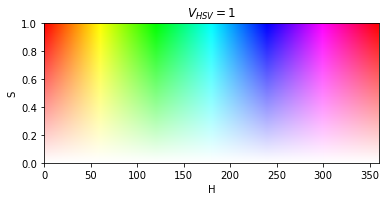

In [32]:
#source: https://stackoverflow.com/questions/10787103/2d-hsv-color-space-in-matplotlib

S, H = np.mgrid[0:1:100j, 0:1:300j]
V = np.ones_like(S)
HSV = np.dstack((H,S,V))
RGB = hsv_to_rgb(HSV)
pl.imshow(RGB, origin="lower", extent=[0, 360, 0, 1], aspect=150)
pl.xlabel("H")
pl.ylabel("S")
pl.xlabel
pl.title("$V_{HSV}=1$")
pl.show();

<a class="anchor" id="Fig_18"></a>
<h5>Figure 18.Impact of varying Value/Brightness on Hue holding Saturation constant at 100%</h5>
<a href='#toc'>Return to TOC</a>

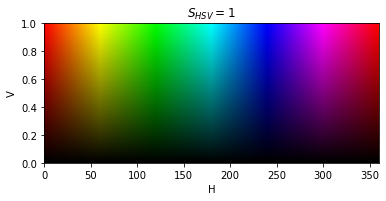

In [33]:
#source: https://stackoverflow.com/questions/10787103/2d-hsv-color-space-in-matplotlib

V, H = np.mgrid[0:1:100j, 0:1:300j]
S = np.ones_like(V)
HSV = np.dstack((H,S,V))
RGB = hsv_to_rgb(HSV)
pl.imshow(RGB, origin="lower", extent=[0, 360, 0, 1], aspect=150)
pl.xlabel("H")
pl.ylabel("V")
pl.xlabel
pl.title("$S_{HSV}=1$")
pl.show();

<a class="anchor" id="GrayScale"></a>
<h4>3.2.4 Converting RGB (color) Images to Grayscale Images</h4>
<a href='#toc'>Return to TOC</a>

One conversion that is often used is image processing is converting an RGB (colored) image to a grayscale image. Essentially, this eliminates the 'hue' and 'saturation' of a color while retaining its luminance (brightness). This simplifies the structure of the array so that there is no channel dimension. This reduces the number of integers (or reals) needed to represent the color from three to one. In turn this simplifies many processing algorithms and reduces computational requirements and complexity.

<a class="anchor" id="GrayScale_Weighted"></a>
<h5>3.2.4.1 Converting RGB Images to Grayscale Images with a Weighted Average</h5>
<a href='#toc'>Return to TOC</a>

There's a lot of science behind converting an RGB image array to a grayscale image (for some of the details see wikipedia or https://e2eml.school/convert_rgb_to_grayscale.html). One convenient way to do this is to take a linear weighted average of the channels. A simple example of this method is shown below. In this case the weights are 0.299, 0.587, and 0.114 for R, G, B, respectively. This set of weights is often cited, but, as we'll demonstrate shortly, other weights are used by the three image libraries we've been discussing. You can see the end results in Figure 20 which displays the grayscale images produced by all three libraries along with the image from the generic weighted average.

It should be noted that our code has revolved around 8-bit channels and 24- or 32-bit combinations. With grayscale images there is only one channel. So, one 8-bit number enables 256 shades of gray. However, there are certain disciplines where more granularity is required, e.g. medical imaging and remote sensing. In these instances, at least 10-12 bits are needed "to make full use of the sensor accuracy (typically 10 or 12 bits per sample) and to reduce rounding errors in computations. Sixteen bits per sample (65,536 levels) is a convenient choice for such uses, as computers manage 16-bit words efficiently." So, instead of uint8, uint16 might be used in it's place.

In [34]:
# source: https://moonbooks.org/Articles/How-to-convert-an-image-to-grayscale-using-python-/

def np_rgb2gray(rgb):
    return np.uint8(np.dot(rgb[...,:3], [0.299, 0.587, 0.114]))

img_gray = np_rgb2gray(img_rgb)

print("Grayscale conversion using weighted average")
print("Shape of img_gray: {}".format(img_gray.shape))
print("Type of img_gray: {}".format(type(img_gray[0,0])))
print("Type of img_gray[0,0]: {}".format(type(img_gray[0,0])))
print("Value of img_gray[0,0]: {}".format(img_gray[0,0]))

Grayscale conversion using weighted average
Shape of img_gray: (175, 325)
Type of img_gray: <class 'numpy.uint8'>
Type of img_gray[0,0]: <class 'numpy.uint8'>
Value of img_gray[0,0]: 210


<a class="anchor" id="Fig_19"></a>
<h5>Figure 19.Converting RGB image to Grayscale using Numpy Weighted Average</h5>
<a href='#toc'>Return to TOC</a>

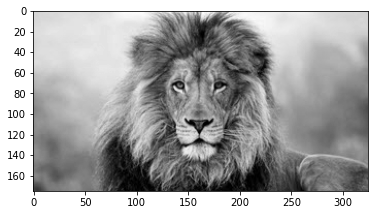

In [35]:
plt.imshow(img_gray, cmap = plt.get_cmap('gray'))
plt.show()

<a class="anchor" id="GrayScale_sk"></a>
<h5>3.2.4.2 Converting RGB images to Grayscale images using skimage</h5>
<a href='#toc'>Return to TOC</a>

With 'skimage' there is a separate method ('rgb2gray' from the skimage.color module) that can be used to carry out the conversion. Here, the underlying weights are reportedly 0.2125, 0.7154, and 0.0721 for r, g, and b, respectively. Figure 20 shows the end result of the skimage conversion along with the conversions for the other libraries.

In [36]:
# converting RGB to grayscale using skimage

img_sk_gray = rgb2gray(img_sk)

# results

print("Type of img_sk_gray:",type(img_sk_gray))
print("Shape of grayscale image: {}".format(img_sk_gray.shape))
print("Number of pixels in grayscale image {} \n".format(img_sk_gray.shape[0]*img_sk_gray.shape[1]))

ul_sk_gray = img_sk_gray[0,0]
print("Type of value in upper-left corner img_sk_gray[0,0]: {}".format(type(ul_sk_gray)))
print("Value of the upper-left corner img_sk_gray[0,0]: {}".format(ul_sk_gray))
print("Value of the upper-left corner as integer img_sk_gray[0,0]: {}\n".format(int(ul_sk_gray * 255.0)))
      
print("Max value of img_sk_gray:",np.max(img_sk_gray))
print("Min value of img_sk_gray:",np.min(img_sk_gray))

# converting to integer values for subsequent analysis
img_sk_gray_int = np.uint8(img_sk_gray * 255)

Type of img_sk_gray: <class 'numpy.ndarray'>
Shape of grayscale image: (175, 325)
Number of pixels in grayscale image 56875 

Type of value in upper-left corner img_sk_gray[0,0]: <class 'numpy.float64'>
Value of the upper-left corner img_sk_gray[0,0]: 0.8304964705882353
Value of the upper-left corner as integer img_sk_gray[0,0]: 211

Max value of img_sk_gray: 0.9758894117647059
Min value of img_sk_gray: 0.0


Looking at the 'shape' of the grayscale image (above), we can see that the channel dimension has been eliminated. This means that only one number is used to describe the color or in this case luminance of a pixel. Looking at the value for the upper-left corner (img_sk_gray\[0,0\]), we see that it is no longer an integer but a (64-bit) floating point number equal to ~0.85. Since it is a floating point number, the theoretical min and max values are no longer 0 and 255 but 0.0 (black) and 1.0 (white), respectively. Since this is an numpy ndarray, we can easily calculate the actual min and max values which turn out to be 0.0 and ~.976. If an integer representation is required, it's easy to convert the floating point to an the integer value by multiplying the floating point value * 255.0, rounding the value, and then converting the value to an 'int'.  

<a class="anchor" id="GrayScale_cv2"></a>
<h5>3.2.4.3 Converting RGB images to Grayscale images using cv2</h5>
<a href='#toc'>Return to TOC</a>

As with other conversions, cv2 relies on its 'cvtColor' method to convert an RGB image to grayscale. In this instance, the conversion flag is 'COLOR_RGB2GRAY (or in the case of BGR it's 'COLOR_BGR2GRAY). Unlike skimage, the result is a numpy array of unit8 values rather than floating points. According to the 'opencv' documentation, the cvtColor method uses the same weights as the 'weighted average' method discussed above (i.e., 0.299, 0.587, 0.114). Again, the end result is displayed in Figure 20.

In [37]:
img_cv2_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
print("Converting RGB Lion Image to Gray Image in cv2")
print("Data type for img_cv2_gray: {}".format(type(img_cv2_gray)))
print("Data type for img_cv2_gray[0,0] is {}:".format(type(img_cv2_gray[0,0])))
print("Upper-Left Corner of image is {} for Gray and {} for RGB".format(img_cv2_gray[0,0],img_rgb[0,0],))

Converting RGB Lion Image to Gray Image in cv2
Data type for img_cv2_gray: <class 'numpy.ndarray'>
Data type for img_cv2_gray[0,0] is <class 'numpy.uint8'>:
Upper-Left Corner of image is 210 for Gray and [189 216 237] for RGB


<a class="anchor" id="GrayScale_PIL"></a>
<h5>3.2.4.4 Converting RGB images to Grayscale images using PIL</h5>
<a href='#toc'>Return to TOC</a>

In section 2.3.4, we discussed and illustrated the structure of a PIL image file. As noted, the general structure of the file is 'non-standard'. If you convert a file with this structure using methods provided by the PIL library (here 'ImageOps.grayscale'), the end result is the same type of non-standard file. Again, the remedy is to convert the PIL file to a numpy array ('np.asarray'). The image resulting from the joint grayscale and array conversion is also displayed in Figure 20.

In [38]:
img_PIL_gray = PIL.ImageOps.grayscale(img_PIL)
print("Converting RGB lion image to grayscale image in PIL with 'PIL.ImageOps.grayscale'")
print("Using original PIL image img_PIL based on opening lion.jpb")
print("Object type {}".format(type(img_PIL)))
print("Image Format", img_PIL.format)
print("Size: {}".format(img_PIL.size))
print("Height: {}".format(img_PIL.height))
print("Width: {}\n".format(img_PIL.width))

img_PIL_gray_arr = np.asarray(img_PIL_gray)
print("Converting PIL grayscale to numpy array grayscale using 'np.asarray'")
print("Object type for img_PIL_gray_arr is {}:".format(type(img_PIL_gray_arr)))
print("Data type for img_PIL_gray_arr[0,0] is {}:".format(type(img_PIL_gray_arr[0,0])))
print("Shape of img_PIL_gray_arr is {}: ".format(img_PIL_gray_arr.shape))
print("Upper-Left Corner of grayscale PIL array image is: {}".format(img_PIL_gray_arr[0,0]))

Converting RGB lion image to grayscale image in PIL with 'PIL.ImageOps.grayscale'
Using original PIL image img_PIL based on opening lion.jpb
Object type <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image Format JPEG
Size: (325, 175)
Height: 175
Width: 325

Converting PIL grayscale to numpy array grayscale using 'np.asarray'
Object type for img_PIL_gray_arr is <class 'numpy.ndarray'>:
Data type for img_PIL_gray_arr[0,0] is <class 'numpy.uint8'>:
Shape of img_PIL_gray_arr is (175, 325): 
Upper-Left Corner of grayscale PIL array image is: 210


<a class="anchor" id="GrayScale_Comparison"></a>
<h5>3.2.4.5 Comparing the various Grayscale conversion methods</h5>
<a href='#toc'>Return to TOC</a>

A quick comparison of the four grayscale conversion methods indicates that: 

<ol>
    <li> The 'weighted average', cv2, and PIL methods use the same weights. Given this we'd expect them to produce the same grapyscale values at similar locations. This is the case for the cv2 and PIL methods. The grayscale values for the 'weighted average method are very close but not exact, probably reflecting rounding error difference produced by the overall algorithm.</li>
    <li> The 'skimage' conversion method is slightly different than the others, including differences in the weights. However, in spite of the differences in weights, they aren't substantial enough to produce major differences in the grayscale values, especially for the 0-255 range. The differences would be greater if the range were 0-65535.</li>
    
The end result is that when we look at the four grayscale versions of the lion's image, it is very difficult to pinpoint major differences in the grayscale values among the images.

In [39]:
print('Sample Grayscale values produced by the different libraries for a 3x3 square in upper-left corner:\n')
print('Wgt Avg: {}\n'.format(img_gray[0:3,0:3]))
print('skimage: {}\n'.format(img_sk_gray_int[0:3,0:3]))
print('cv2: {}\n'.format(img_cv2_gray[0:3,0:3]))
print('PIL: {}'.format(img_PIL_gray_arr[0:3,0:3]))

Sample Grayscale values produced by the different libraries for a 3x3 square in upper-left corner:

Wgt Avg: [[210 208 208]
 [209 208 208]
 [209 209 208]]

skimage: [[211 210 209]
 [211 210 209]
 [211 210 209]]

cv2: [[210 209 208]
 [210 209 208]
 [210 209 208]]

PIL: [[210 209 208]
 [210 209 208]
 [210 209 208]]


<a class="anchor" id="Fig_20"></a>
<h5>Figure 20. Comparing images produced by 4 RGB to Grayscale conversion methods</h5>
<a href='#toc'>Return to TOC</a>

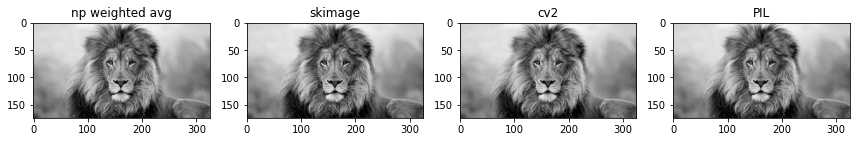

In [40]:
# comparison of grayscale conversions for different libraries

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(12, 3))
ax0.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
ax0.set_title("np weighted avg")
ax1.imshow(img_sk_gray_int, cmap='gray', vmin=0, vmax=255)
ax1.set_title("skimage")
ax2.imshow(img_cv2_gray, cmap='gray', vmin=0, vmax=255)
ax2.set_title("cv2")
ax3.imshow(img_PIL_gray_arr, cmap='gray', vmin=0, vmax=255)
ax3.set_title("PIL")
fig.tight_layout();

<a class="anchor" id="BW"></a>
<h4>3.2.5 Converting Color or Grayscale Images to Black and White (binary)</h4>
<a href='#toc'>Return to TOC</a>

<i>Thresholding</i> is a type of image processing (technically 'segmentation') where the pixels of an image are modified to make the image easier to analyze. In thresholding, an image is converted from color or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with. For example, in the image of the lion we've been exploring, our interest might be in the lion, ignoring the background.

While we'll look at more sophisticated thresholding later, in this example we'll simply select a single value for a threshold then set all the values in the grayscale lion image equal to or above the threshold to 1.0 (white) and all those below to 0.0 (black). Here, we're using the grayscale image from the weight average method because all of the images are similiar. When the threshold value is set to the 1st quartile, most of the background is eliminated, leaving the 'lion' for further investigation. Of course, this is very crude and can be substantially improved with more sophisticated thresholding techniques.

<a class="anchor" id="Fig_21"></a>
<h5>Figure 21. Using a single threshold to convert a grayscale image to black and white</h5>
<a href='#toc'>Return to TOC</a>

Verify that thresholding has worked
Sample converted value in upper-left corner of img_sk_bw: 255
Sample converted value in bottom-center of img_sk_bw: 0

Black and white Image of Lion using 1st Quartile as Threshold


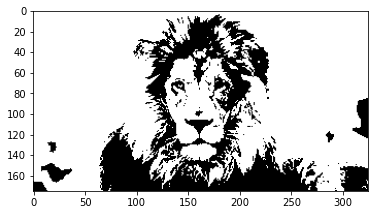

In [41]:
# .25 quantile is the 1st quartile
threshold = np.quantile(img_gray,.25)

img_bw = np.copy(img_gray)
img_bw[img_bw >= threshold] = 255
img_bw[img_bw < threshold] = 0

print("Verify that thresholding has worked")
print("Sample converted value in upper-left corner of img_sk_bw: {}".format(img_bw[0,0]))
print("Sample converted value in bottom-center of img_sk_bw: {}\n".format(img_bw[174,100]))

print("Black and white Image of Lion using 1st Quartile as Threshold")
plt.imshow(img_bw, cmap='gray', vmin=0, vmax=255);


<a class="anchor" id="Invert"></a>
<h5>3.2.5.1 Inverting from Black-on-White to White-on-Black</h5>
<a href='#toc'>Return to TOC</a>

For some reason (which I haven't figured out), you can't create a white on black image by simply reversing the threshold values. Given this, the simplest way (that I've found) is to invert the black on white image. Since the black and white image is a numpy array, this is done by subtracting 255 from the black on white image. If it's an image produced by the skimage library, the library has a 'util'ity subpackage that includes an invert method (i.e.,'skimage.util.invert(img_bw)').

<a class="anchor" id="Fig_22"></a>
<h5>Figure 22. Inverting a black-on-white image to white-on-black</h5>
<a href='#toc'>Return to TOC</a>

White and Black Image of Lion using 1st Quartile as Threshold


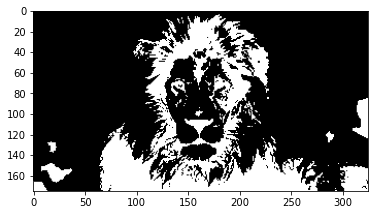

In [42]:
# inverting a black on white imageimg_sk_wb = skimage.util.invert(img_sk_bw)
img_wb = img_bw - 255

print("White and Black Image of Lion using 1st Quartile as Threshold")
plt.imshow(img_wb, cmap='gray');

<a class="anchor" id="Additional"></a>
<h4>3.2.6 Additional color models and their conversion</h4>
<a href='#toc'>Return to TOC</a>

In the discussion of 'color models and spaces', as well as the discussion of conversion from one to the another, we've only examined a few of the possibilities. However, all three libraries support other possibilities. With with 'skimage' and 'cv2' the support is extensive, while PIL only supports a handful. 

<ul>
    <li>'skimage' supports 15+ color models (depending on how your counting). A list is provided in the documentation for the 'skimage.color' module (see https://scikit-image.org/docs/dev/api/skimage.color.html). This documentation also provides details for two methods of conversion from one model/space to another. The one discussed in this notebook is 'skimage.color.convert_colorspace(arr, fromspace, tospace)'. There are other methods that take the form 'skimage.color.c12c2'. For instance, 'skimage.color.rgb2gray' which is similar to the way 'cv2' handles conversion.</li><br>
    <li>'cv2' also supports ~15 models along with their variants. Additionally, it handles conversions with the 'cv2.cvtColor(input_image, flag)' method. As complete list of the flags is found at: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html</li><br>
    <li>PIL supports RGB(A,X,a), HSV(A), HSL(A), CMYK, LAB, L(grayscale) and YCbCr. However, the convertion method 'img.convert(toColorMode)' only handles the conversion of the specified image 'img' to one of the following models: RGB, CMYK, grey scale, black and white images and images whose color depth is defined by a color palette.</li>
</ul>


<a class="anchor" id="ImgDisk"></a>
<h2>4. Saving an Image to Disk</h2>
<a href='#toc'>Return to TOC</a>

When you 'save' an image to disk, you need to specify its file format. Two of the most popular are PNG and JPG(JPEG). Some of the other possible formats include: BMP (8-bit, 24-bit, 32-bit), GIF, PPM, PNM, and TIFF. Since our focus is on what transpires after we've read an image file and the fact that the python image libraries will automatically convert the image to a numpy array on reading, we'll stick with one file format -- PNG -- in saving our images for external purposes.

For the 'skimage' and 'cv2' libraries the methods used to save a file are basically the same:

    skio.imwrite('file_path_name', 'image_to_be_saved')
    cv2.imwrite('file_path_name', 'image_to_be_saved')
    
For 'PIL' the process is more like the Python process for saving files:
    
    img = img.save('file_path_name') 

In all three cases the image can be an MxN, MxNx3, or MxNx4 array.
